# Unit 5 - Financial Planning


In [10]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import requests
import json

#%matplotlib inline

In [11]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [12]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [13]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [59]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [60]:
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()

In [61]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} # ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15719.48
The current value of your 5.3 # ETH is $2181.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [78]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [79]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY").encode('ascii', 'ignore').decode('latin-1')
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY").encode('ascii', 'ignore').decode('latin-1')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",

)

In [80]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    
).df
df_portfolio

# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.445
Current SPY closing price: $334.55


In [81]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16727.50
The current value of your 200 AGG shares is $23889.00


### Savings Health Analysis

In [83]:
total_shares = my_spy_value + my_agg_value
total_shares

40616.5

In [84]:
total_crypto = my_btc_value + my_eth_value
total_crypto

17900.486999999997

In [93]:
# Create savings DataFrame
value_data = {
    "Amount" : [total_crypto,total_shares]
}
savings_health = ["crypto", "shares"]

df_savings = pd.DataFrame(value_data, index=savings_health)


# Display savings DataFrame
display(df_savings)

,Amount
crypto,17900.487
shares,40616.500


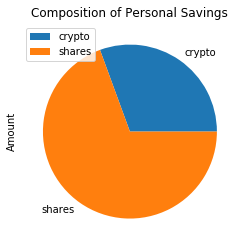

In [96]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [99]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings >= emergency_fund:
  print("Congratulations! You have enough money in your emergency fund.")
elif total_savings < emergency_fund:
  print("You do not have enough :(")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [103]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [104]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [125]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [126]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [128]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999884,1.015616,1.012855,0.995935,1.000867,1.013463,1.002002,0.998411,0.990034,1.000647,...,0.990605,0.995083,1.002911,1.006979,1.000271,1.008709,0.993825,1.006772,1.000918,0.992508
2,1.005613,1.016039,1.014312,0.993533,1.009006,1.014585,1.003415,0.997157,0.998575,1.006956,...,0.992313,0.994212,1.000209,1.008900,1.017316,1.008119,0.983608,0.997703,1.002120,1.000438
3,1.009897,1.019695,1.004440,0.999178,1.008248,1.016259,1.008706,0.996996,0.994272,1.007080,...,0.985593,0.984960,1.002438,1.014189,1.011172,1.003722,0.987991,0.995670,1.002916,1.000932
4,1.002646,1.016751,1.005682,0.997176,1.010110,1.024444,1.008342,0.990420,1.003151,1.013058,...,0.976132,0.989045,0.999234,1.016450,1.008199,1.007418,0.991045,0.992240,0.998011,1.012620
5,0.994276,1.019149,0.996295,1.004452,1.009721,1.025753,1.013074,0.995952,0.995391,1.007120,...,0.977469,0.999614,0.998634,1.020970,1.010010,1.002881,0.999948,0.997847,0.994507,1.018227
6,1.001424,1.022428,0.999182,1.012141,1.002231,1.030685,1.013698,0.983945,0.997505,1.003416,...,0.978021,1.013661,1.006357,1.024820,1.006098,1.001283,1.001052,1.005334,0.983662,1.019054
7,1.010663,1.026610,0.979512,1.014319,1.000710,1.029122,1.011788,0.984357,0.996997,1.006514,...,0.976903,1.020603,1.014192,1.018641,1.005948,1.005219,1.008443,1.012567,0.988623,1.016010
8,1.007149,1.022728,0.980408,1.003860,0.991629,1.031333,1.020192,0.988670,0.995601,1.011540,...,0.978626,1.016688,1.010407,1.017911,1.007046,1.010678,1.010259,1.006336,0.987843,1.006580
9,1.010348,1.019947,0.993975,1.007395,1.004622,1.031411,1.016030,0.988414,1.000775,0.997999,...,0.985384,1.014072,1.013716,1.024893,1.005162,1.022404,1.014292,1.019756,0.985227,1.019453


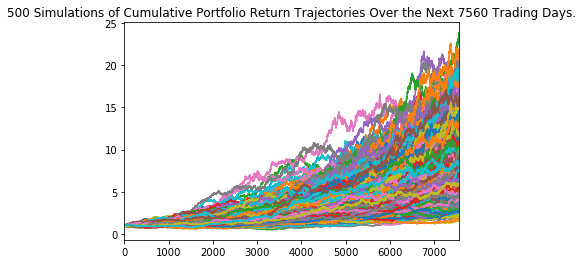

In [129]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

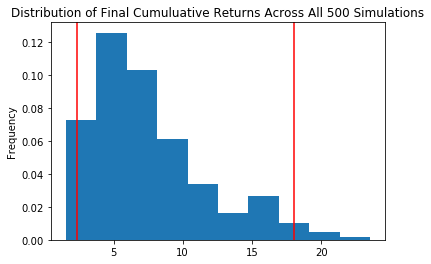

In [130]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [131]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.530067
std               4.145209
min               1.550296
25%               4.429312
50%               6.491234
75%               9.506139
max              23.541721
95% CI Lower      2.353679
95% CI Upper     18.014404
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [132]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47073.59 and $360288.07


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [133]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $70610.38 and $540432.11


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [134]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [135]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009238,0.998418,1.003544,1.006883,1.004199,1.008765,0.992691,0.996925,0.998619,0.999148,...,1.003143,1.000149,1.002842,0.996760,1.000731,1.000934,0.998469,0.997021,1.006248,1.001768
2,1.006911,0.995273,0.996488,1.008235,1.005537,1.010906,0.986544,0.987705,0.992070,0.993185,...,1.001161,1.001843,0.996540,0.998880,1.000622,1.013360,0.999916,0.999134,1.010706,0.995347
3,1.003077,0.993735,0.996738,1.009971,1.014819,1.014621,0.989165,0.990036,0.979764,0.983515,...,1.004173,1.008010,0.995519,0.983723,0.990187,1.004943,1.011900,1.005189,1.032359,1.005943
4,1.007708,0.992032,0.996381,1.019662,1.012911,1.005035,0.991532,0.990615,0.985786,0.972114,...,1.004641,1.016186,0.988617,0.982592,0.999277,1.003515,1.010675,1.004874,1.029984,1.012077
5,1.014974,0.994304,0.993183,1.019335,1.008788,1.004194,0.985116,0.987726,0.980820,0.968744,...,1.005244,1.021924,0.992542,0.978779,0.999330,1.010381,1.002736,1.014211,1.026566,1.010806
6,1.010897,0.992510,0.980674,1.020602,1.007716,1.010563,0.997387,0.987717,0.976365,0.965048,...,1.012833,1.027796,0.987576,0.978420,1.008028,1.019238,0.999136,1.014764,1.020680,1.005948
7,1.011228,1.000036,0.980611,1.015838,1.008932,1.002150,0.996701,0.987209,0.972370,0.971975,...,1.016287,1.023619,0.982264,0.982859,1.009788,1.013959,0.998611,1.006408,1.011727,1.015660
8,1.014092,0.999751,0.985072,1.024466,1.014035,0.995213,0.989974,0.992167,0.980287,0.979683,...,1.010685,1.016492,0.983896,0.986981,1.000852,1.007397,0.996853,1.014429,1.000760,1.007795
9,1.023070,0.987591,0.979171,1.030136,1.006030,1.003366,0.989914,0.996543,0.973422,0.982390,...,1.017201,1.026881,0.992328,0.987141,1.002154,1.007335,0.992342,1.014561,0.993686,1.009338


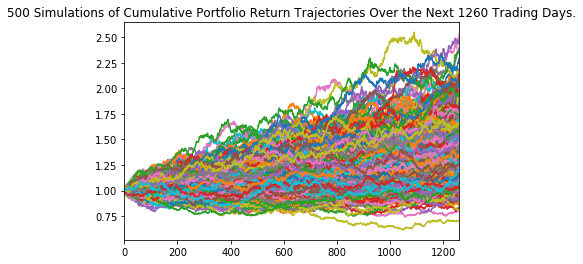

In [136]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

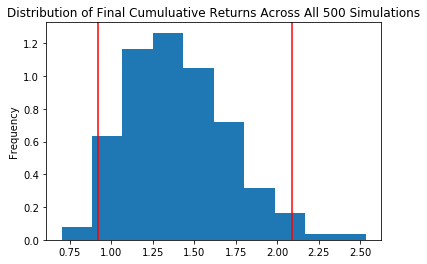

In [137]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [138]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.405359
std               0.304396
min               0.700775
25%               1.175577
50%               1.387804
75%               1.583687
max               2.535686
95% CI Lower      0.922012
95% CI Upper      2.087418
Name: 1260, dtype: float64


In [139]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $141220.76 and $1080864.22


### Ten Years Retirement Option

In [140]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [141]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999045,1.002086,1.001948,1.004006,1.000399,0.992423,0.991300,0.999732,0.996170,1.008519,...,0.984952,0.998741,1.008416,1.004128,1.008882,1.003477,1.001679,0.996025,0.995815,0.991712
2,0.993921,1.006876,1.001914,0.997808,0.998048,0.994780,0.982235,1.010675,0.990176,1.011445,...,0.993640,1.001636,1.005230,0.998745,1.017942,0.997696,1.001448,0.998591,1.013672,0.991094
3,1.005280,1.008162,1.000017,0.997647,0.988896,1.000783,0.987548,1.013539,0.994636,1.012959,...,0.982078,0.999122,1.017715,0.992265,1.028917,0.990008,0.995834,0.991756,1.012403,0.996484
4,1.010855,1.004096,0.993490,1.001534,0.975960,0.996956,0.987888,1.005958,1.003585,1.022816,...,0.989824,1.001400,1.010494,0.988938,1.020583,0.983162,0.999695,0.998832,1.014909,0.990903
5,1.014297,1.003024,1.002991,1.003013,0.975779,1.002913,0.996751,1.006993,1.009383,1.017776,...,0.996072,1.003307,1.001820,0.983873,1.021981,0.986172,1.000939,1.001750,1.014322,1.001824
6,1.010526,1.001270,0.994739,1.006985,0.971432,1.000485,0.995852,1.011673,1.012339,1.015973,...,0.995282,1.007370,0.997929,0.972619,1.017167,1.004631,0.995283,0.989833,1.010168,0.989476
7,1.008394,0.995784,0.991932,1.004787,0.979425,1.013942,1.002545,1.012544,1.002107,1.015875,...,0.996195,1.010821,0.999331,0.967367,1.023801,0.997594,1.000840,0.994441,1.019987,0.999363
8,1.013800,0.988483,0.989620,1.003675,0.973010,1.006228,1.007082,1.013789,1.014184,1.026577,...,1.000619,1.005887,0.998834,0.963126,1.019976,1.002800,0.998106,0.997232,1.017502,1.000562
9,1.015272,0.983525,0.995629,1.007766,0.974527,1.010555,0.994256,1.006224,1.014080,1.023505,...,1.002589,1.002953,1.002393,0.960437,1.019783,1.008352,1.008162,1.002757,1.014347,1.016226


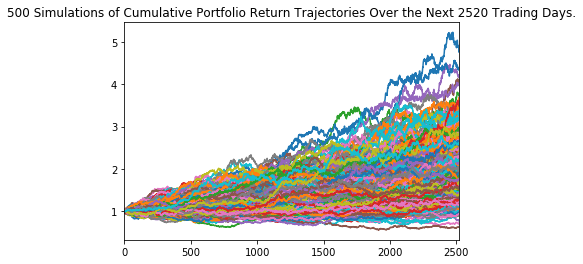

In [142]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

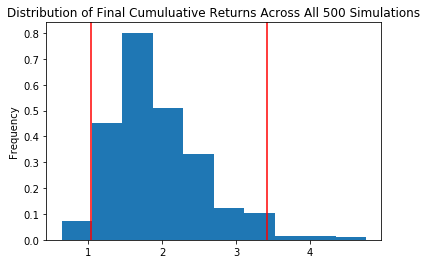

In [143]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [144]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.935143
std               0.615005
min               0.637971
25%               1.509184
50%               1.817035
75%               2.274308
max               4.756527
95% CI Lower      1.033437
95% CI Upper      3.417825
Name: 2520, dtype: float64


In [145]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $141220.76 and $1080864.22
